In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## 1- Load the dataset and explore the variables.

In [3]:
cus_churn = pd.read_csv('customer_churn.csv')
cus_churn.head()
#cus_churn.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def churn_num(x):
    if 'Yes' in x:
        return 1
    elif 'No' in x:
        return 0
    else:
        return 'unknown'
    
cus_churn['Churn'] = list(map(churn_num, cus_churn['Churn']))

In [5]:
cus_churn = cus_churn[['SeniorCitizen','tenure', 'MonthlyCharges', 'Churn']]

In [6]:
cus_churn.Churn.value_counts(dropna=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [7]:
cus_churn.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn               int64
dtype: object

In [8]:
cus_churn.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [9]:
cus_churn.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [10]:
#cus_churn['Churn']

## 2- We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [11]:
y = cus_churn['Churn']
X = cus_churn.drop('Churn',axis = 1)

In [12]:
X['SeniorCitizen'].value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

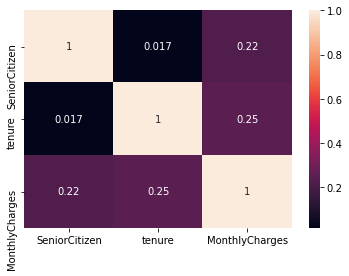

In [13]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# all variables are numeric, so i did not seperate into num,cat

transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

In [16]:
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [17]:
y_train = y_train.reset_index(drop=True) 

In [18]:
y_test = y_test.reset_index(drop=True) 

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [20]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

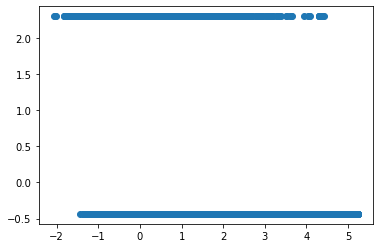

In [21]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

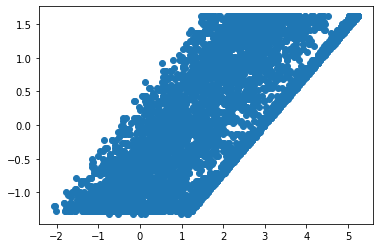

In [22]:
plt.scatter(logits,X_train_scaled['tenure'])

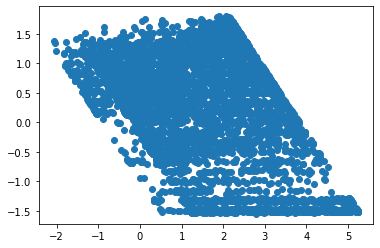

In [23]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<AxesSubplot:>

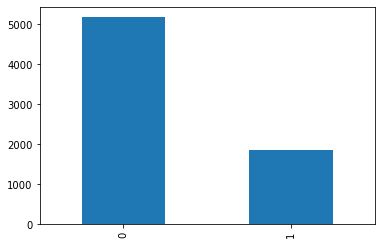

In [24]:
count = cus_churn['Churn'].value_counts()
count.plot(kind = 'bar')

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=40, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

In [28]:
from sklearn.utils import resample

train_cus = pd.concat([X_train_scaled, y_train],axis=1)
train_cus.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
2,-0.435476,-1.196572,-0.819594,1
3,-0.435476,1.168670,-1.483535,0
4,-0.435476,-0.829552,0.658427,1


In [40]:
# OverSampling

no_churn = train_cus[train_cus['Churn']==0]
yes_churn = train_cus[train_cus['Churn']==1]

In [41]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [42]:
yes_churn_oversampled = resample(yes_churn,
                                    replace=True,
                                    n_samples = len(no_churn),
                                    random_state=0)

In [43]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [44]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
3,-0.435476,1.168670,-1.483535,0
5,-0.435476,1.046330,0.503285,0
6,-0.435476,-0.258631,0.701800,0


In [45]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [46]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [36]:
confusion_matrix(y_test,pred)

array([[1118,  180],
       [ 343,  120]], dtype=int64)

## USING SMOT 

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [39]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035
